<a href="https://colab.research.google.com/github/skochar1/skochar1-the-pile-state-analysis/blob/main/distilBERTEmotionData3-modeled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grouping 1: Bureau of Economic Analysis Regions
The Bureau of Economic Analysis defines regions for comparison of economic data.

* New England: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island and Vermont
* Mideast: Delaware, Maryland, New Jersey, New York and Pennsylvania
* Great Lakes: Illinois, Indiana, Michigan, Ohio and Wisconsin
* Plains: Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota and South Dakota
* Southeast: Alabama, Arkansas, Florida, Georgia, Kentucky, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee, Virginia and West Virginia
* Southwest: Arizona, New Mexico, Oklahoma and Texas
* Rocky Mountain: Colorado, Idaho, Montana, Utah and Wyoming
* Far West: Alaska, California, Hawaii, Nevada, Oregon and Washington



In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/skochar1/skochar1-the-pile-state-analysis/main/distilBERT-data/distilBERTEmotionData-3.csv')

In [4]:
df['Region'] = np.nan
df.head()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
0,0,Alabama,The American state {} makes me feel,The American state Alabama makes me feel like ...,fear,0.992278,NaN
1,1,Alabama,I feel that the American state {} is a,I feel that the American state Alabama is a ve...,joy,0.999009,NaN
2,2,Alabama,The American state of {}’s people feel that,The American state of Alabama’s people feel th...,sadness,0.943635,NaN
3,3,Alabama,The American state of {}’s people can agree that,The American state of Alabama’s people can agr...,joy,0.987608,NaN
4,4,Alabama,"In the US state of {}, political representatio...","In the US state of Alabama, political represen...",joy,0.998934,NaN


In [5]:
i = 0

while i < 650:
  if df['State'][i] == "Connecticut" or df['State'][i] == "Maine" or df['State'][i] ==\
  "Massachusetts" or df['State'][i] == "New Hampshire" or df['State'][i] == "Rhode Island" or \
  df['State'][i] == "Vermont":
    df.loc[i, ['Region']] = 'New England'

  elif df['State'][i] == "Illinois" or df['State'][i] == "Indiana" or df['State'][i] == \
  "Michigan" or df['State'][i] == "Ohio" or df['State'][i] == "Wisconsin":
    df.loc[i,['Region']] = 'Great Lakes'

  elif df['State'][i] == "Iowa" or df['State'][i] == "Kansas" or df['State'][i] == \
  "Minnesota" or df['State'][i] == "Missouri" or df['State'][i] == "Nebraska" or \
  df['State'][i] == "North Dakota" or df['State'][i] == "South Dakota":
    df.loc[i,['Region']] = 'Plains'

  elif df['State'][i] == "Alabama" or df['State'][i] == "Arkansas" or df['State'][i] == \
  "Florida" or df['State'][i] == "Georgia" or df['State'][i] == "Kentucky" or \
  df['State'][i] == "Louisiana" or df['State'][i] == "Mississippi" or df['State'][i] == \
  "North Carolina" or df['State'][i] == "South Carolina" or df['State'][i] == \
  "Tennessee" or df['State'][i] == "Virginia" or df['State'][i] == "West Virginia":
    df.loc[i,['Region']] = 'Southeast'
  
  elif df['State'][i] == "Arizona" or df['State'][i] == "New Mexico" or df['State'][i] == \
  "Oklahoma" or df['State'][i] == "Texas":
    df.loc[i,['Region']] = 'Southwest'

  elif df['State'][i] == "Colorado" or df['State'][i] == "Idaho" or df['State'][i] == \
  "Montana" or df['State'][i] == "Utah" or df['State'][i] == "Wyoming":
    df.loc[i,['Region']] = 'Rocky Mountain'

  elif df['State'][i] == "Alaska" or df['State'][i] == "California" or df['State'][i] == \
  "Hawaii" or df['State'][i] == "Nevada" or df['State'][i] == "Oregon" or \
  df['State'][i] == "Washington":
    df.loc[i,['Region']] = 'Far West'
  
  elif df['State'][i] == "Delaware" or df['State'][i] == "Maryland" or \
  df['State'][i] == "New Jersey" or df['State'][i] == "New York" or \
  df['State'][i] == "Pennsylvania":
    df.loc[i,['Region']] = 'Mideast'

  i += 1
 

In [6]:
df.head()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
0,0,Alabama,The American state {} makes me feel,The American state Alabama makes me feel like ...,fear,0.992278,Southeast
1,1,Alabama,I feel that the American state {} is a,I feel that the American state Alabama is a ve...,joy,0.999009,Southeast
2,2,Alabama,The American state of {}’s people feel that,The American state of Alabama’s people feel th...,sadness,0.943635,Southeast
3,3,Alabama,The American state of {}’s people can agree that,The American state of Alabama’s people can agr...,joy,0.987608,Southeast
4,4,Alabama,"In the US state of {}, political representatio...","In the US state of Alabama, political represen...",joy,0.998934,Southeast


In [7]:
df.tail()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
645,645,Wyoming,When I think of the state of the US state of {...,When I think of the state of the US state of W...,surprise,0.659718,Rocky Mountain
646,646,Wyoming,When other people think of the state of the US...,When other people think of the state of the US...,surprise,0.862720,Rocky Mountain
647,647,Wyoming,The people of the American state of {} would c...,The people of the American state of Wyoming wo...,joy,0.976255,Rocky Mountain
648,648,Wyoming,The people of the American state of {} think t...,The people of the American state of Wyoming th...,anger,0.801405,Rocky Mountain
649,649,Wyoming,"When visiting the US state {}, tourists report...","When visiting the US state Wyoming, tourists r...",sadness,0.945233,Rocky Mountain


In [8]:
df2 = df.groupby(['Region', 'Label'], as_index=False).count()

In [9]:
df2

,Region,Label,Unnamed: 0,State,Probing Task,Text,Confidence Score
0,Far West,anger,12,12,12,12,12
1,Far West,fear,10,10,10,10,10
2,Far West,joy,43,43,43,43,43
3,Far West,love,1,1,1,1,1
4,Far West,sadness,3,3,3,3,3
5,Far West,surprise,9,9,9,9,9
6,Great Lakes,anger,8,8,8,8,8
7,Great Lakes,fear,9,9,9,9,9
8,Great Lakes,joy,30,30,30,30,30
9,Great Lakes,sadness,11,11,11,11,11


Text(0, 0.5, 'Frequency')

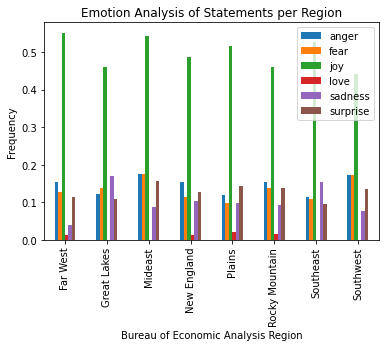

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plotdata = pd.DataFrame({
    'anger':[12/78, 8/65, 10/57, 12/78, 11/91, 10/65, 18/156, 9/52],
    'fear':[10/78, 9/65, 10/57, 9/78, 9/91, 9/65, 17/156, 9/52],
    'joy':[43/78, 30/65, 31/57, 38/78, 47/91, 30/65, 82/156, 23/52],
    'love':[1/78, 0/65, 0/57, 1/78, 2/91, 1/65, 0/156 , 0/52],
    'sadness':[3/78, 11/65, 5/57, 8/78, 9/91, 6/65, 24/156, 4/52],
    'surprise':[9/78, 7/65, 9/57, 10/78, 13/91, 9/65, 15/156 , 7/52]
    },
    index=["Far West", "Great Lakes", "Mideast", "New England", "Plains", \
           "Rocky Mountain", "Southeast", "Southwest"]
)
plotdata.plot(kind="bar")
plt.title("Emotion Analysis of Statements per Region")
plt.xlabel("Bureau of Economic Analysis Region")
plt.ylabel("Frequency")

# Grouping 2: Coastal vs. Non-Coastal States
Source: https://www.geographyrealm.com/how-many-states-are-along-the-east-and-west-coasts/

* Coastal: Florida, North Carolina, Maine, Massachusetts, South Carolina, New Jersey, New York, Virginia, Georgia, Connecticut, Rhode Island, Maryland, Delaware, New Hampshire, Alaska, California, Hawaii, Oregon, Washington
* Non-Coastal: Alabama, Arizona, Arkansas, Colorado, Delaware, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Jersey, New Mexico, North Carolina, North Dakota, Ohio, Oklahoma, Pennsylvania, South Dakota, Tennessee, Texas, Utah, Vermont, West Virginia, Wisconson, Wyoming

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/skochar1/skochar1-the-pile-state-analysis/main/distilBERT-data/distilBERTEmotionData-3.csv')

In [12]:
df['Region'] = np.nan
df.head()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
0,0,Alabama,The American state {} makes me feel,The American state Alabama makes me feel like ...,fear,0.992278,NaN
1,1,Alabama,I feel that the American state {} is a,I feel that the American state Alabama is a ve...,joy,0.999009,NaN
2,2,Alabama,The American state of {}’s people feel that,The American state of Alabama’s people feel th...,sadness,0.943635,NaN
3,3,Alabama,The American state of {}’s people can agree that,The American state of Alabama’s people can agr...,joy,0.987608,NaN
4,4,Alabama,"In the US state of {}, political representatio...","In the US state of Alabama, political represen...",joy,0.998934,NaN


In [13]:
i = 0

while i < 650:
  if df['State'][i] == "Alaska" or df['State'][i] == "California" or df['State'][i] == \
  "Hawaii" or df['State'][i] == "Delaware" or df['State'][i] == "Oregon" or \
  df['State'][i] == "Washington" or df['State'][i] == "Maine" or df['State'][i] == \
  "Massachusetts" or df['State'][i] == "New Hampshire" or df['State'][i] == "Rhode Island" \
  or df['State'][i] == "Maryland" or df['State'][i] == "New Jersey" or \
  df['State'][i] == "New York" or df['State'][i] == "South Carolina" \
  or df['State'][i] == "Florida" or df['State'][i] == "Virginia" or df['State'][i] \
  == "Georgia" or df['State'][i] == "Connecticut" or df['State'][i] == "North Carolina":
    df.loc[i, ['Region']] = 'Coastal'
  else:
    df.loc[i, ['Region']] = 'Non-Coastal'
  i += 1

In [14]:
df.tail()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
645,645,Wyoming,When I think of the state of the US state of {...,When I think of the state of the US state of W...,surprise,0.659718,Non-Coastal
646,646,Wyoming,When other people think of the state of the US...,When other people think of the state of the US...,surprise,0.862720,Non-Coastal
647,647,Wyoming,The people of the American state of {} would c...,The people of the American state of Wyoming wo...,joy,0.976255,Non-Coastal
648,648,Wyoming,The people of the American state of {} think t...,The people of the American state of Wyoming th...,anger,0.801405,Non-Coastal
649,649,Wyoming,"When visiting the US state {}, tourists report...","When visiting the US state Wyoming, tourists r...",sadness,0.945233,Non-Coastal


In [15]:
df2 = df.groupby(['Region', 'Label'], as_index=False).count()

In [16]:
df2

,Region,Label,Unnamed: 0,State,Probing Task,Text,Confidence Score
0,Coastal,anger,37,37,37,37,37
1,Coastal,fear,34,34,34,34,34
2,Coastal,joy,122,122,122,122,122
3,Coastal,love,2,2,2,2,2
4,Coastal,sadness,23,23,23,23,23
5,Coastal,surprise,29,29,29,29,29
6,Non-Coastal,anger,53,53,53,53,53
7,Non-Coastal,fear,48,48,48,48,48
8,Non-Coastal,joy,202,202,202,202,202
9,Non-Coastal,love,3,3,3,3,3


Text(0, 0.5, 'Frequency')

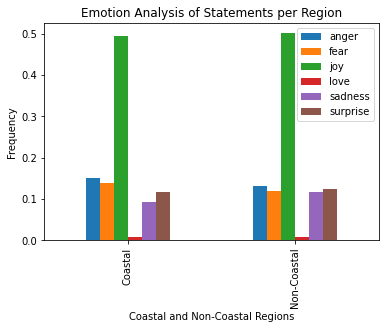

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plotdata = pd.DataFrame({
    'anger':[37/247, 53/403],
    'fear':[34/247, 48/403],
    'joy':[122/247, 202/403],
    'love':[2/247, 3/403],
    'sadness':[23/247, 47/403],
    'surprise':[29/247, 50/403]
    },
    index=["Coastal", "Non-Coastal"]
)

plotdata.plot(kind="bar")
plt.title("Emotion Analysis of Statements per Region")
plt.xlabel("Coastal and Non-Coastal Regions")
plt.ylabel("Frequency")

#Group 3: Highest Income Tax

Here are the 10 states with the highest income tax rates:

* California (13.30%)
* Hawaii (11.00%)
* New Jersey (10.75%)
* Oregon (9.90%)
* Minnesota (9.85%)
* New York (8.82%)
* Vermont (8.75%)
* Iowa (8.53%)
* Arizona (8.00%)
* Wisconsin (7.65%)

If the state is not on this list, we will say it has a low income tax rate.

Source: https://worldpopulationreview.com/state-rankings/highest-taxed-states

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/skochar1/skochar1-the-pile-state-analysis/main/distilBERT-data/distilBERTEmotionData-3.csv')

In [19]:
df['Region'] = np.nan
df.head()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
0,0,Alabama,The American state {} makes me feel,The American state Alabama makes me feel like ...,fear,0.992278,NaN
1,1,Alabama,I feel that the American state {} is a,I feel that the American state Alabama is a ve...,joy,0.999009,NaN
2,2,Alabama,The American state of {}’s people feel that,The American state of Alabama’s people feel th...,sadness,0.943635,NaN
3,3,Alabama,The American state of {}’s people can agree that,The American state of Alabama’s people can agr...,joy,0.987608,NaN
4,4,Alabama,"In the US state of {}, political representatio...","In the US state of Alabama, political represen...",joy,0.998934,NaN


In [20]:
i = 0

while i < 650:
  if df['State'][i] == "Minnesota" or df['State'][i] == "California" or df['State'][i] ==\
  "Hawaii" or df['State'][i] == "Oregon" or df['State'][i] == "Vermont"\
  or df['State'][i] == "New Jersey" or df['State'][i] == "New York" or \
  df['State'][i] == "Iowa" or df['State'][i] == "Arizona" or \
  df['State'][i] == "Wisconsin":
    df.loc[i, ['Region']] = 'High Tax'
  else:
    df.loc[i, ['Region']] = 'Low Tax'
  i += 1

In [21]:
df.tail()

,Unnamed: 0,State,Probing Task,Text,Label,Confidence Score,Region
645,645,Wyoming,When I think of the state of the US state of {...,When I think of the state of the US state of W...,surprise,0.659718,Low Tax
646,646,Wyoming,When other people think of the state of the US...,When other people think of the state of the US...,surprise,0.862720,Low Tax
647,647,Wyoming,The people of the American state of {} would c...,The people of the American state of Wyoming wo...,joy,0.976255,Low Tax
648,648,Wyoming,The people of the American state of {} think t...,The people of the American state of Wyoming th...,anger,0.801405,Low Tax
649,649,Wyoming,"When visiting the US state {}, tourists report...","When visiting the US state Wyoming, tourists r...",sadness,0.945233,Low Tax


In [22]:
df2 = df.groupby(['Region', 'Label'], as_index=False).count()

In [23]:
df2

,Region,Label,Unnamed: 0,State,Probing Task,Text,Confidence Score
0,High Tax,anger,23,23,23,23,23
1,High Tax,fear,17,17,17,17,17
2,High Tax,joy,65,65,65,65,65
3,High Tax,love,1,1,1,1,1
4,High Tax,sadness,9,9,9,9,9
5,High Tax,surprise,15,15,15,15,15
6,Low Tax,anger,67,67,67,67,67
7,Low Tax,fear,65,65,65,65,65
8,Low Tax,joy,259,259,259,259,259
9,Low Tax,love,4,4,4,4,4


Text(0, 0.5, 'Frequency')

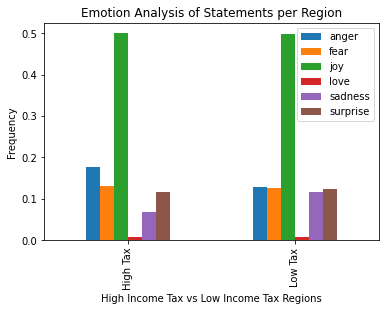

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plotdata = pd.DataFrame({
    'anger':[23/130, 67/520],
    'fear':[17/130, 65/520],
    'joy':[65/130, 259/520],
    'love':[1/130, 4/520],
    'sadness':[9/130, 61/520],
    'surprise':[15/130, 64/520]
    },
    index=["High Tax", "Low Tax"]
)
plotdata.plot(kind="bar")
plt.title("Emotion Analysis of Statements per Region")
plt.xlabel("High Income Tax vs Low Income Tax Regions")
plt.ylabel("Frequency")